
  
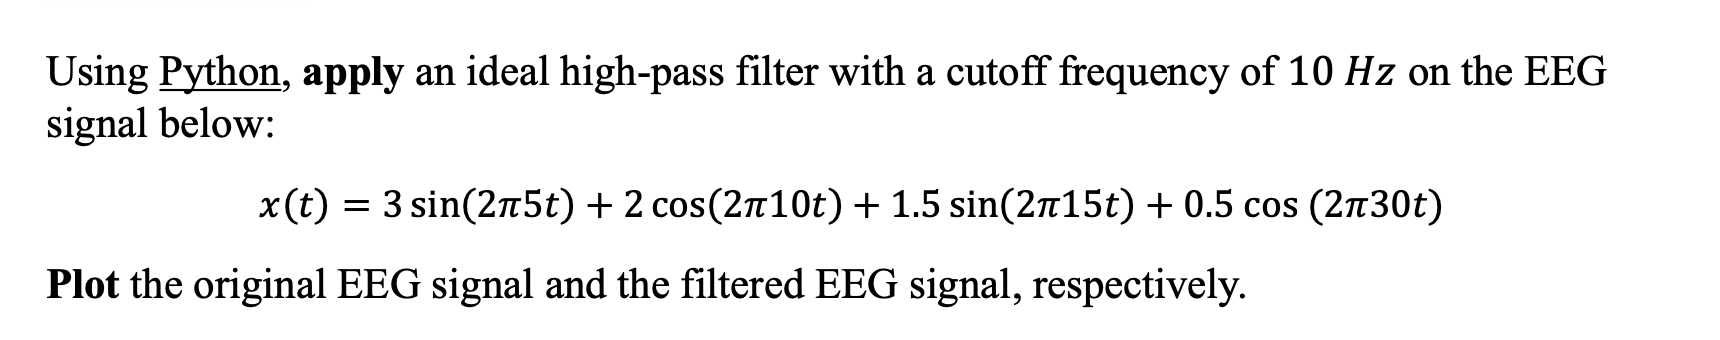

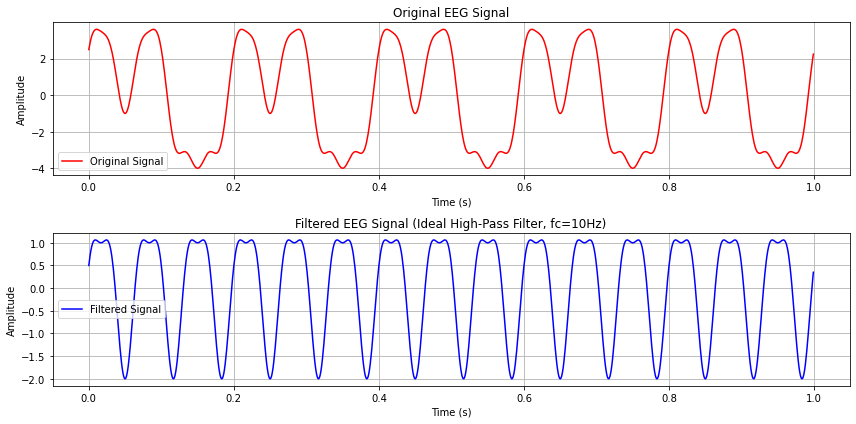

In [ ]:
## Habiba Khalil - 202200720

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

# 1. Create the time vector
fs = 1000  # Sampling frequency in Hz
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second duration

##### 2. Define the original EEG signal
x = 3 * np.sin(2 * np.pi * 5 * t) + 2 * np.cos(2 * np.pi * 10 * t) + 1.5 * np.sin(2 * np.pi * 15 * t) + 0.5 * np.cos(2 * np.pi * 30 * t)

# 3. Perform FFT to convert signal to frequency domain
X_fft = fft(x)
freqs = fftfreq(fs, 1/fs)  # Frequency vector for plotting and filtering


# 4. Create the high-pass filter mask
##### Cutoff frequency in Hz
cutoff =10
##### Only keep frequencies higher than 10 Hz
HPF_mask =np.abs(freqs) > cutoff


##### 5. Apply the high-pass filter in the frequency domain
X_fft_filtered =X_fft * HPF_mask


# 6. Convert the filtered signal back to time domain using inverse FFT
x_filtered = np.real(ifft(X_fft_filtered))

# 7. Plot the original and filtered signals
plt.figure(figsize=(12, 6))

# Plot original signal
plt.subplot(2, 1, 1)
plt.plot(t, x, color="red", label="Original Signal")
plt.title("Original EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

# Plot filtered signal
plt.subplot(2, 1, 2)
plt.plot(t, x_filtered, color="blue", label="Filtered Signal")
plt.title("Filtered EEG Signal (Ideal High-Pass Filter, fc=10Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()